In [1]:
import pandas  as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
data=pd.read_excel('bsm1LT.xlsx')
data.insert(17,'COD',data.iloc[:,1]+data.iloc[:,2]+data.iloc[:,3]+data.iloc[:,4]+data.iloc[:,5]+data.iloc[:,6]+data.iloc[:,7])
data.insert(18,'BOD',0.25*(data.iloc[:,2]+data.iloc[:,4]+(1-0.08)*(data.iloc[:,5]+data.iloc[:,6])))
data.insert(19,'Snkj',data.iloc[:,10]+data.iloc[:,11]+data.iloc[:,12]+0.08*(data.iloc[:,5]+data.iloc[:,6])+0.06*(data.iloc[:,3]+data.iloc[:,7]))
Clock=(['A']*24+['B']*24+['C']*24+['D']*24)*609+['D']
Season=['Autumn']*46*96+['Winter']*91*96+['Spring']*91*96+['Summer']*91*96+['Autumn']*91*96+['Winter']*91*96+['Spring']*91*96+['Summer']*17*96+['Summer']
data.insert(20,'Clock_6',Clock)
data.insert(21,'Season',Season)
print(data)

                t         Si         Ss         Xi         Xs        Xbh  Xba  \
0        0.000000  30.000000  75.265000  50.955767  201.35489  28.035642    0   
1        0.010417  29.896443  70.380949  50.605668  202.47766  27.954862    0   
2        0.020833  29.858065  65.999456  50.143942  202.77697  27.807387    0   
3        0.031250  29.856741  62.200994  49.638921  202.52563  27.637536    0   
4        0.041667  29.875787  58.952897  49.127641  201.90738  27.468361    0   
5        0.052083  29.903695  56.176757  48.616921  201.00861  27.304971    0   
6        0.062500  29.923717  53.791485  48.081401  199.82625  27.138663    0   
7        0.072917  29.918419  51.731025  47.488768  198.33046  26.957819    0   
8        0.083333  29.880501  49.945689  46.829409  196.53166  26.758288    0   
9        0.093750  29.811199  48.394599  46.110375  194.47178  26.540208    0   
10       0.104167  29.718581  47.035562  45.345260  192.20652  26.301823    0   
11       0.114583  29.612506

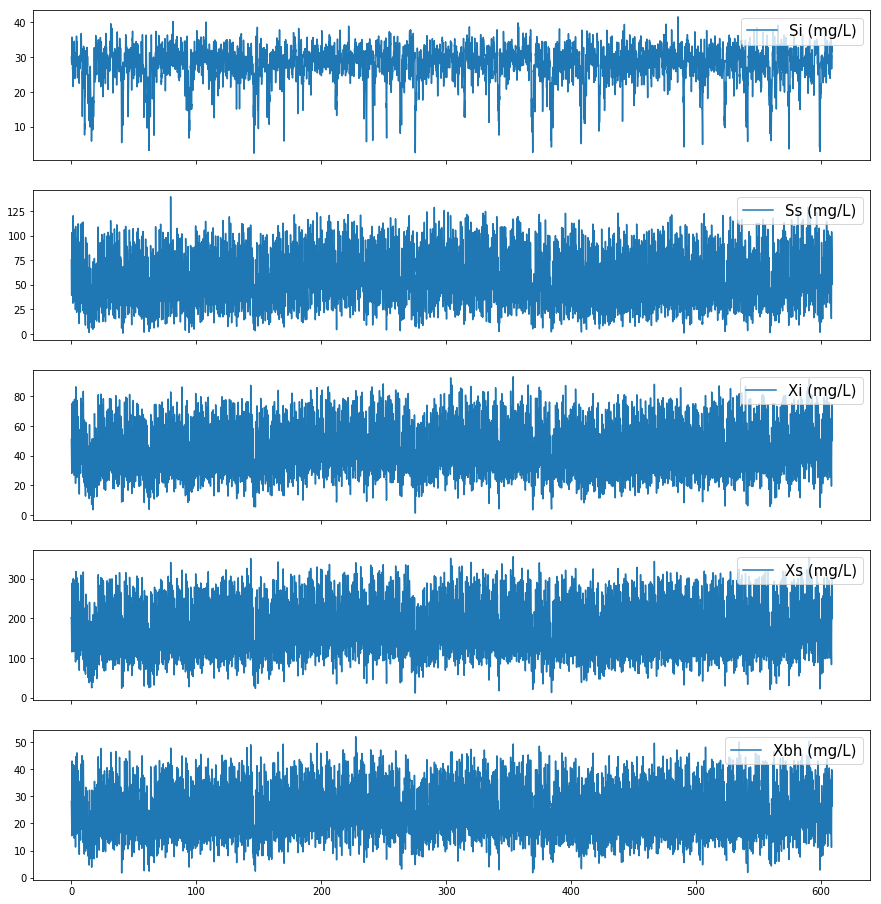

In [22]:
plt.figure(figsize=(15,16))
ax1 = plt.subplot(511)
Date=np.arange(0,609+1/96, 1/96)
plt.plot(Date, data['Si'].values,label='Si (mg/L)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False, fontsize=15)
# share x only
ax2 = plt.subplot(512, sharex=ax1)
plt.plot(Date, data['Ss'].values,label='Ss (mg/L)')
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax3= plt.subplot(513, sharex=ax1)
plt.plot(Date, data['Xi'].values,label='Xi (mg/L)')
# make these tick labels invisible
plt.setp(ax3.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax4= plt.subplot(514, sharex=ax1)
plt.plot(Date, data['Xs'].values,label='Xs (mg/L)')
# make these tick labels invisible
plt.setp(ax4.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax5= plt.subplot(515, sharex=ax1)
plt.plot(Date, data['Xbh'].values,label='Xbh (mg/L)')
# make these tick labels invisible
plt.setp(ax5.get_xticklabels(), visible=True)
plt.legend(loc=1,shadow=False,  fontsize=15)

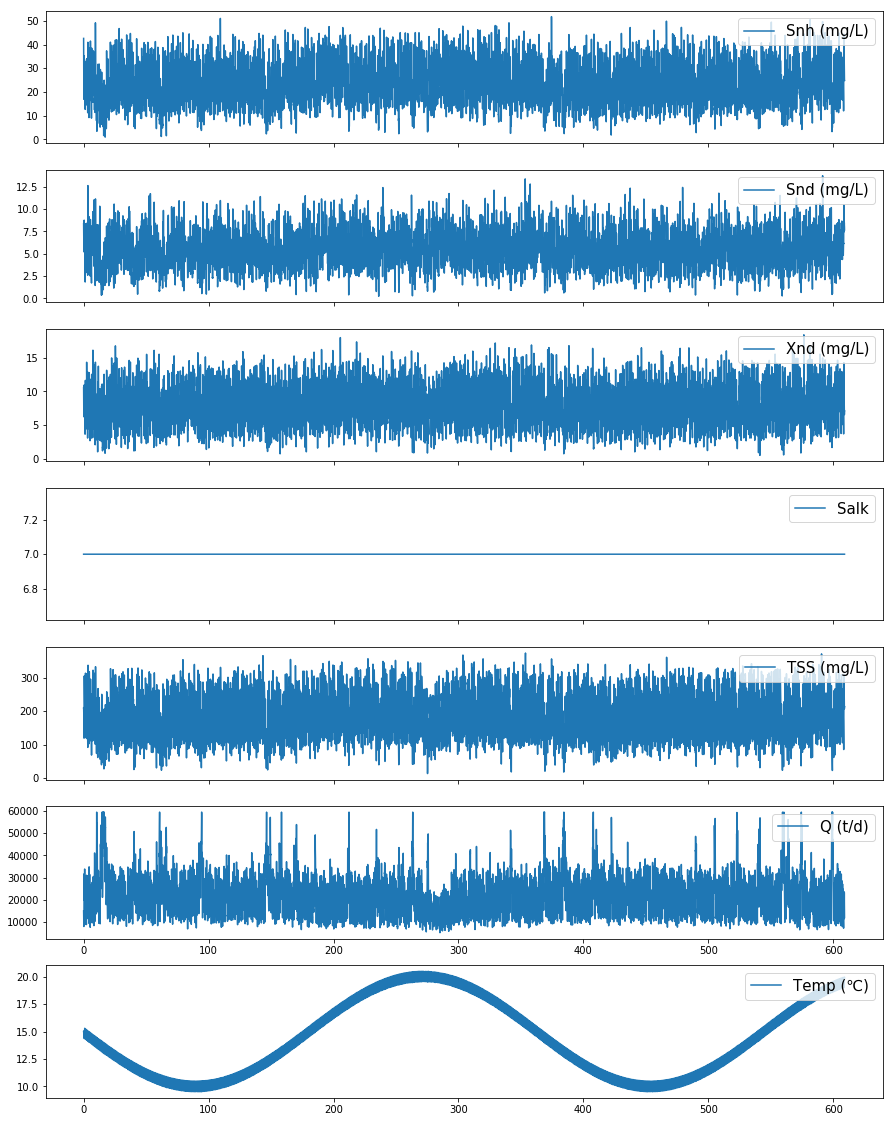

In [23]:
plt.figure(figsize=(15,20))
ax1 = plt.subplot(711)
Date=np.arange(0,609+1/96, 1/96)
plt.plot(Date, data['Snh'].values,label='Snh (mg/L)')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False, fontsize=15)
# share x only
ax2 = plt.subplot(712, sharex=ax1)
plt.plot(Date, data['Snd'].values,label='Snd (mg/L)')
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax3= plt.subplot(713, sharex=ax1)
plt.plot(Date, data['Xnd'].values,label='Xnd (mg/L)')
# make these tick labels invisible
plt.setp(ax3.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax4= plt.subplot(714, sharex=ax1)
plt.plot(Date, data['Salk'].values,label='Salk')
# make these tick labels invisible
plt.setp(ax4.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax5= plt.subplot(715, sharex=ax1)
plt.plot(Date, data['TSS'].values,label='TSS (mg/L)')
# make these tick labels invisible
plt.setp(ax5.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax6= plt.subplot(716, sharex=ax1)
plt.plot(Date, data['Q'].values,label='Q (t/d)')
# make these tick labels invisible
plt.setp(ax6.get_xticklabels(), visible=False)
plt.legend(loc=1,shadow=False,  fontsize=15)
ax7= plt.subplot(717, sharex=ax1)
plt.plot(Date, data['Temp'].values,label='Temp (â„ƒ)')
# make these tick labels invisible
plt.setp(ax6.get_xticklabels(), visible=True)
plt.legend(loc=1,shadow=False,  fontsize=15)

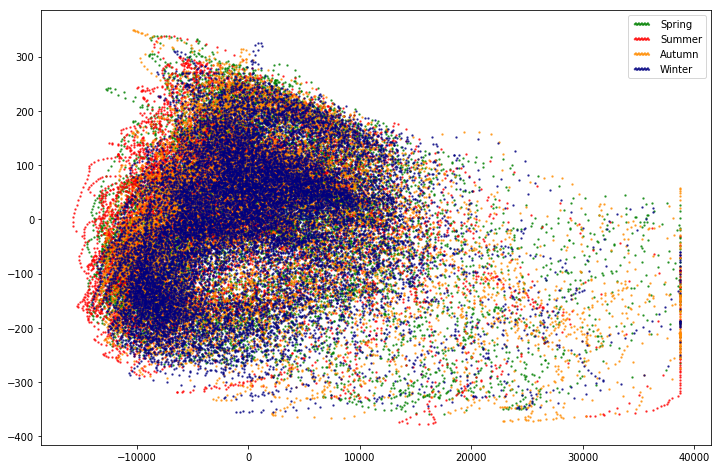

In [54]:
from sklearn.decomposition import PCA, IncrementalPCA
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=10)
data_ipca = ipca.fit_transform(data[['COD','BOD','TSS','Snkj','Q','Temp']])

pca = PCA(n_components=n_components)
data_pca = pca.fit_transform(data[['COD','BOD','TSS','Snkj','Q','Temp']])

colors = ['green', 'red', 'darkorange','navy']

Season=['Spring','Summer','Autumn','Winter']
plt.figure(figsize=(12,8))
for color, i in zip(colors, Season):
    plt.scatter(x=data_ipca[data.iloc[:,-1].values==i,0],y=data_ipca[data.iloc[:,-1].values==i,1],s=2,alpha=0.65,color=color,label=i)
plt.legend(loc="best", shadow=False, scatterpoints=15)

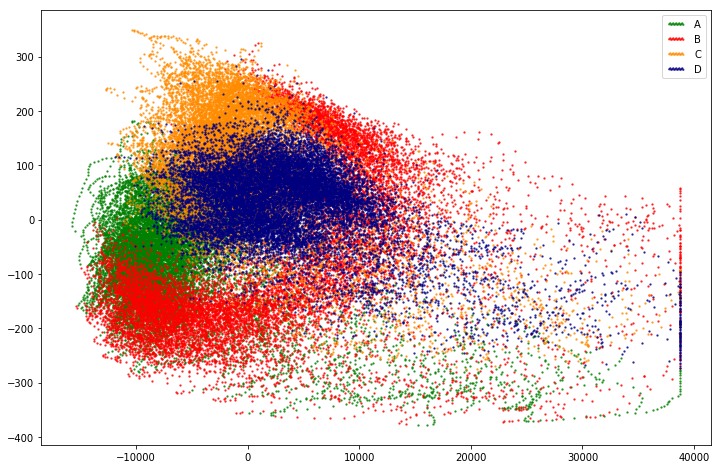

In [53]:
Clock_6=['A','B','C','D']
plt.figure(figsize=(12,8))
for color, i in zip(colors, Clock_6):
    plt.scatter(x=data_ipca[data.iloc[:,-2].values==i,0],y=data_ipca[data.iloc[:,-2].values==i,1],s=2,alpha=0.65,color=color,label=i)
plt.legend(loc="best", shadow=False, scatterpoints=15)

In [48]:
print(ipca.explained_variance_ratio_)

[  9.99764484e-01   2.33263857e-04]


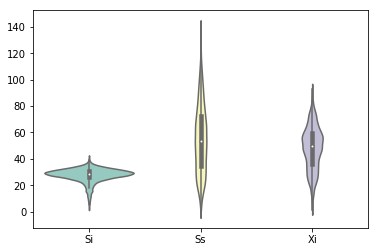

In [6]:
sns.violinplot(data=data[['Si','Ss','Xi']],orient="v",palette="Set3") 
plt.show()

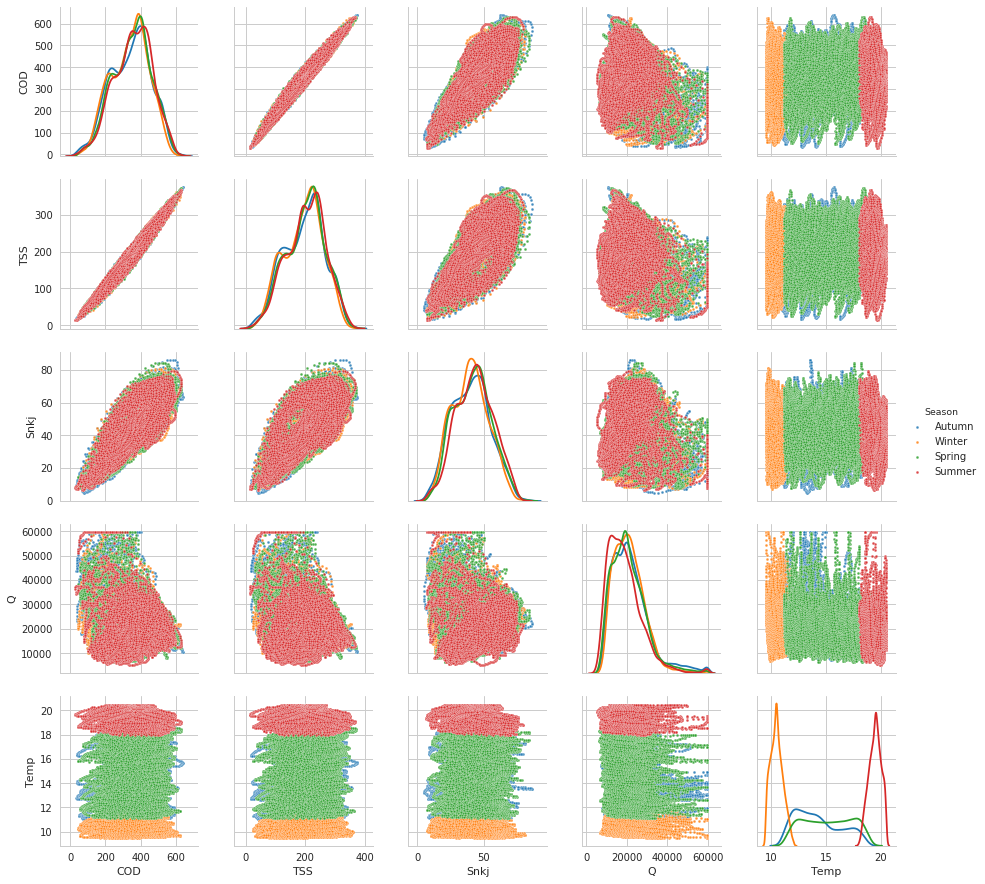

In [35]:
def Pairplot(self):
    sns.set_style('whitegrid')
    sns.pairplot(self,vars=['COD','TSS','Snkj','Q','Temp'],hue='Season',diag_kind='kde',palette="tab10",plot_kws={'alpha':0.85,'s':8})
    plt.show()
Pairplot(data)

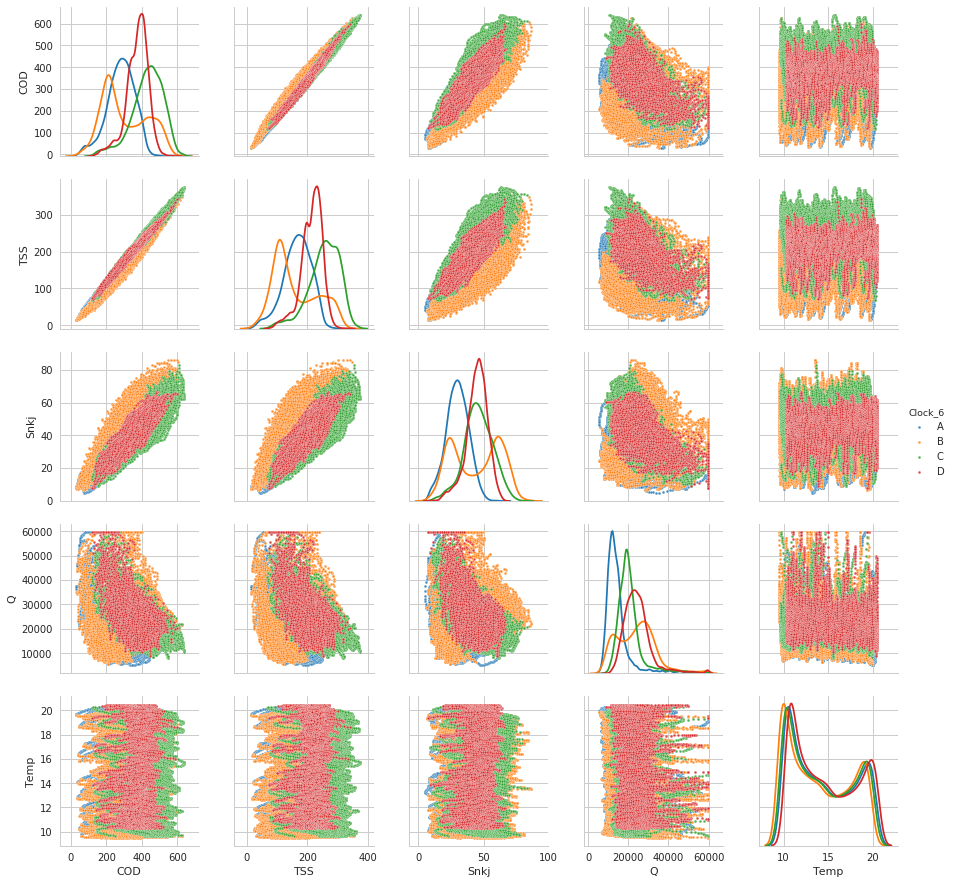

In [36]:
def Pairplot(self):
    sns.set_style('whitegrid')
    sns.pairplot(self,vars=['COD','TSS','Snkj','Q','Temp'],hue='Clock_6',diag_kind='kde',palette="tab10",plot_kws={'alpha':0.85,'s':8})
    plt.show()
Pairplot(data)

In [40]:
data.describe()

t            Si            Ss            Xi            Xs  \
count  58465.000000  58465.000000  58465.000000  58465.000000  58465.000000   
mean     304.500000     27.900716     54.684608     48.293007    190.199208   
std      175.807668      5.155634     25.210761     16.160736     63.182291   
min        0.000000      2.389049      0.963165      1.307878     11.520647   
25%      152.250000     25.958065     34.618219     36.412195    143.134690   
50%      304.500000     28.758486     53.573595     49.589830    196.166430   
75%      456.750000     31.142770     72.406505     59.698929    234.761940   
max      609.000000     41.589261    139.341250     93.250629    355.842130   

                Xbh      Xba       Xp       So      Sno           Snh  \
count  58465.000000  58465.0  58465.0  58465.0  58465.0  58465.000000   
mean      26.481333      0.0      0.0      0.0      0.0     22.881110   
std        8.917541      0.0      0.0      0.0      0.0      8.532551   
min        1.705331      0.0      0.0      0.0      0.0      0.946093   
25%       19.878885      0.0      0.0      0.0      0.0     16.601091   
50%       27.265630      0.0      0.0      0.0      0.0     22.493694   
75%       32.863316      0.0      0.0      0.0      0.0     28.468017   
max       52.022621      0.0      0.0      0.0      0.0     51.802970   

                Snd           Xnd     Salk           TSS             Q  \
count  58465.000000  58465.000000  58465.0  58465.000000  58465.000000   
mean       5.426159      7.997720      7.0    198.730161  20850.541374   
std        2.084097      3.092165      0.0     65.831793   8499.755514   
min        0.249968      0.566803      7.0     13.705512   5110.098900   
25%        3.877753      5.557941      7.0    149.750830  14654.977000   
50%        5.360754      8.051810      7.0    204.775710  19670.050000   
75%        6.860155     10.267161      7.0    244.957590  25337.600000   
max       13.734128     18.351094      7.0    373.757890  59580.000000   

               Temp           COD           BOD          Snkj  
count  58465.000000  58465.000000  58465.000000  58465.000000  
mean      14.334018    347.558872     67.311661     41.321077  
std        3.421970    109.465321     22.679127     14.005758  
min        9.516753     29.235499      5.765696      4.778909  
25%       11.082545    265.482615     50.049240     30.572785  
50%       13.752611    357.020064     69.112888     41.550605  
75%       17.592312    425.618833     83.668726     51.035695  
max       20.487602    639.361935    128.011615     86.293234

In [2]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(data.iloc[:,1:-2])
Scaled=pd.DataFrame(data_scaled,columns=['Si', 'Ss', 'Xi', 'Xs', 'Xbh', 'Xba', 'Xp', 'So', 'Sno', 'Snh',
       'Snd', 'Xnd', 'Salk', 'TSS', 'Q', 'Temp', 'COD', 'BOD', 'Snkj'])
print(Scaled)


             Si        Ss        Xi        Xs       Xbh  Xba   Xp   So  Sno  \
0      0.407186  0.816341  0.164769  0.176565  0.174299  0.0  0.0  0.0  0.0   
1      0.387100  0.622610  0.143105  0.194335  0.165241  0.0  0.0  0.0  0.0   
2      0.379656  0.448814  0.114534  0.199073  0.148703  0.0  0.0  0.0  0.0   
3      0.379399  0.298145  0.083284  0.195095  0.129656  0.0  0.0  0.0  0.0   
4      0.383093  0.169306  0.051646  0.185309  0.110685  0.0  0.0  0.0  0.0   
5      0.388506  0.059187  0.020043  0.171084  0.092362  0.0  0.0  0.0  0.0   
6      0.392390 -0.035427 -0.013094  0.152371  0.073713  0.0  0.0  0.0  0.0   
7      0.391362 -0.117157 -0.049765  0.128696  0.053433  0.0  0.0  0.0  0.0   
8      0.384008 -0.187974 -0.090566  0.100226  0.031058  0.0  0.0  0.0  0.0   
9      0.370565 -0.249499 -0.135059  0.067624  0.006602  0.0  0.0  0.0  0.0   
10     0.352601 -0.303407 -0.182403  0.031770 -0.020130  0.0  0.0  0.0  0.0   
11     0.332026 -0.351275 -0.231741 -0.006471 -0.049

In [40]:
def generator(data, lookback, delay, min_index, max_index, batch_size=128,train_ratio=0.6,valid_ratio=0.2,test_ratio=0.2):
        lookback = lookback + delay
        result = []
        data=data[min_index:max_index]
        for index in range(len(data) - lookback):
            result.append(data[index: index + lookback])
        result = np.array(result)
        print(result)
        row1 = round(train_ratio * result.shape[0])
        row2= row1+round(valid_ratio * result.shape[0])
        train = result[:row1]
        valid = result[row1:row2]
        test = result[row2:]
        train_sample=train[:,:-delay]
        train_target=train[:,-delay:]
        valid_sample=valid[:,:-delay]
        valid_target=valid[:,-delay:]
        test_sample=test[:,:-delay]
        test_target=test[:,-delay:]
        return train_sample,train_target,valid_sample,valid_target,test_sample,test_target
Dataset=Scaled[['TSS']].values
lookback=288
step=4
delay=48
batch_size=32
dataset=generator(data=Dataset,lookback=lookback,delay=delay,min_index=0,max_index=34560)
print(dataset[0].shape,dataset[1].shape,dataset[2].shape,dataset[3].shape)



[[[ 0.17513814]
  [ 0.18302072]
  [ 0.17949017]
  ..., 
  [ 1.59935139]
  [ 1.71726472]
  [ 1.82267761]]

 [[ 0.18302072]
  [ 0.17949017]
  [ 0.16893819]
  ..., 
  [ 1.71726472]
  [ 1.82267761]
  [ 1.91964922]]

 [[ 0.17949017]
  [ 0.16893819]
  [ 0.15414233]
  ..., 
  [ 1.82267761]
  [ 1.91964922]
  [ 2.00618595]]

 ..., 
 [[ 0.88831181]
  [ 1.01981459]
  [ 1.11897391]
  ..., 
  [ 0.53901802]
  [ 0.52653807]
  [ 0.50397659]]

 [[ 1.01981459]
  [ 1.11897391]
  [ 1.18583048]
  ..., 
  [ 0.52653807]
  [ 0.50397659]
  [ 0.47236272]]

 [[ 1.11897391]
  [ 1.18583048]
  [ 1.22371083]
  ..., 
  [ 0.50397659]
  [ 0.47236272]
  [ 0.43094044]]]
(20534, 288, 1) (20534, 48, 1) (6845, 288, 1) (6845, 48, 1)


In [41]:
from keras.models import Sequential
from keras.layers import LSTM, Dense,Flatten,Dropout,Activation
def build_model(layers):  #layers [1,50,100,1]
    model = Sequential()
    model.add(LSTM(layers[2], input_shape=(288,1,),return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(layers[2],return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(output_dim=layers[3]))
    model.add(Activation("linear"))

    model.compile(loss="mse", optimizer="rmsprop")
    return model
LSTM=build_model([1,288,50,48])
LSTM.summary()
                 
      

/home/zks/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=48)`
  # This is added back by InteractiveShellApp.init_path()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 288, 50)           10400     
_________________________________________________________________
dropout_17 (Dropout)         (None, 288, 50)           0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_18 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 48)                2448      
_________________________________________________________________
activation_8 (Activation)    (None, 48)                0         
Total params: 33,048
Trainable params: 33,048
Non-trainable params: 0
_________________________________________________________________


In [63]:
from keras.optimizers import RMSprop
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][0]
        yield samples, targets

lookback = 288
step = 4
delay = 48
batch_size = 128
train_gen = generator(Scaled[['TSS']].values,lookback=lookback,delay=delay,min_index=0,max_index=34560,shuffle=True,step=step,batch_size=batch_size)
val_gen = generator(Scaled[['TSS']].values,lookback=lookback,delay=delay,min_index=34560,max_index=44560,step=step,batch_size=batch_size)
val_steps=(44560-34560-lookback)
model = Sequential()
model.add(Flatten(input_shape=(lookback//step,Scaled[['TSS']].values.shape[-1])))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='sgd', loss='mae')
history = model.fit_generator(train_gen,steps_per_epoch=100,epochs=20,validation_data=val_gen,validation_steps=val_steps)
         

Epoch 1/20
100/100 [==============================] - 180s 2s/step - loss: 0.5338 - val_loss: 0.4388
Epoch 2/20
100/100 [==============================] - 155s 2s/step - loss: 0.4224 - val_loss: 0.4098
Epoch 3/20
100/100 [==============================] - 195s 2s/step - loss: 0.4111 - val_loss: 0.4009
Epoch 4/20
100/100 [==============================] - 194s 2s/step - loss: 0.3992 - val_loss: 0.3980
Epoch 5/20
100/100 [==============================] - 197s 2s/step - loss: 0.3940 - val_loss: 0.3811
Epoch 6/20
 97/100 [============================>.] - ETA: 0s - loss: 0.3857- ETA: 1s

KeyboardInterrupt: 